In [1]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import os
from active_fluid import active_fluid
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import matplotlib.patches as patches
from tqdm import trange
%matplotlib notebook  
#testing git

model initialized


<IPython.core.display.Javascript object>


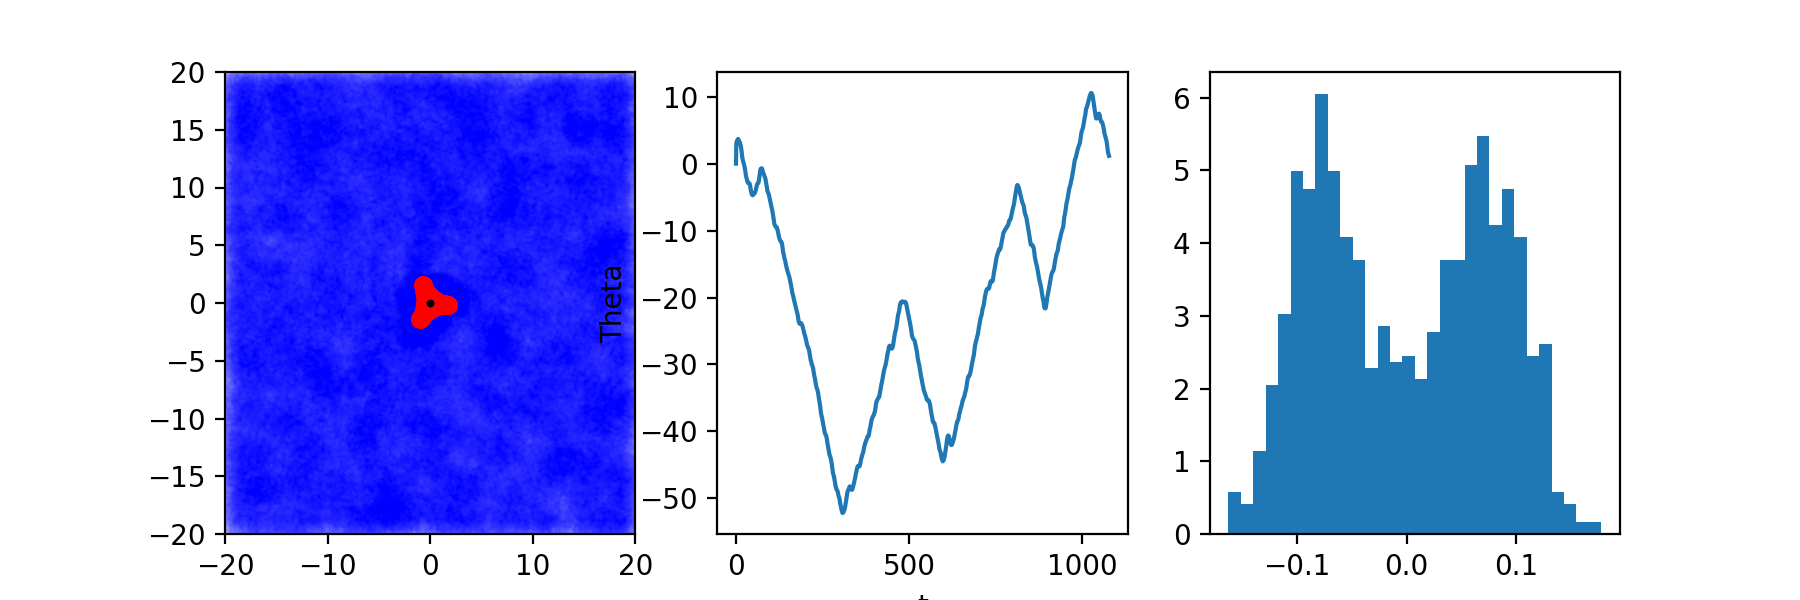

100%|██████████| 100/100 [00:01<00:00, 70.60it/s]


In [8]:
# 0. simulation

AF1 = active_fluid(N_ptcl=20000)
AF1.u = 50
AF1.Dr = 1
AF1.alpha = 1
AF1.lamb = 1*AF1.u
AF1.l_passive = 10
AF1.L = 40
AF1.R = 3
AF1.Rb = 1
AF1.mu_T = 0.1
AF1.mu_R = np.array([30])
# AF1.RA = np.array([AF1.R])/2
AF1.set_zero()


# Visualization
fig, (ax1,ax2,ax3)= plt.subplots(1,3,figsize=(9,3))


ax1.set_xlim(-AF1.L/2,AF1.L/2)
ax1.set_ylim(-AF1.L/2,AF1.L/2)

centerX,centerY = AF1.config()

pointX = (AF1.X.reshape(-1,1)+centerX).reshape(-1)
pointY = (AF1.Y.reshape(-1,1)+centerY).reshape(-1)

bath = ax1.scatter(AF1.x, AF1.y,color='blue',alpha=0.2*2000/AF1.N_ptcl,s=100)
body = ax1.scatter(pointX,pointY,color='red',s=300*(AF1.Rb/3)**2*(40/AF1.L)**2)
hinge = ax1.scatter(AF1.X,AF1.Y, c='black',s=30*(AF1.Rb/3)**2)

for i in trange(100):
    AF1.time_evolve()
#     bath.set_offsets(np.hstack((AF1.x,AF1.y)))
#     (pointX,pointY)=AF1.config()
#     body.set_offsets(np.hstack((pointX,pointY)))
# print(np.vstack((AF1.x,AF1.y)).shape)
# print(pointX.shape)
Theta_traj = np.zeros(3000)
torque_traj=[]
N_iter = 10
def animate(i):
    if (i+1)%100==0:
        print(i+1)
    ax2.clear()
    ax3.clear()
    torque=0
    for _ in range(N_iter):
        torque+=AF1.time_evolve()
        torque_traj.append(torque)
    
    torque/=N_iter

    bath.set_offsets(np.vstack((AF1.x,AF1.y)).T)
    (centerX,centerY)=AF1.config()
    pointX = (AF1.X.reshape(-1,1)+centerX).reshape(-1)
    pointY = (AF1.Y.reshape(-1,1)+centerY).reshape(-1)
    body.set_offsets(np.vstack((pointX,pointY)).T)
    Theta_traj[i]=AF1.Theta
    ax2.plot(Theta_traj[:i])
    ax2.set_xlabel('t')
    ax2.set_ylabel('Theta')
    ax3.hist(np.array(torque_traj).reshape(-1),bins=30,density=True)
    ax3.set_yscale('log')
    ax3.set_xlabel('tau')

    return body,bath

# update(T)
anim = FuncAnimation(fig,animate,np.arange(1, 2000),interval=3, blit=True)
FFwriter = animation.FFMpegWriter(fps=120)
# plt.show()
# anim.save('rot_test.mp4', writer = FFwriter)

In [2]:

AF1 = active_fluid(N_ptcl=20000)
AF1.u = 50
AF1.Dr = 1
AF1.alpha = 1
AF1.lamb = 1*AF1.u
AF1.l_passive = 10
AF1.L = 40
AF1.R = 3
AF1.Rb = 1
AF1.mu_T = 0.1
AF1.mu_R = np.array([30])
# AF1.RA = np.array([AF1.R])/2
AF1.set_zero()


# Visualization
fig, (ax1,ax2,ax3)= plt.subplots(1,3,figsize=(9,3))


ax1.set_xlim(-AF1.L/2,AF1.L/2)
ax1.set_ylim(-AF1.L/2,AF1.L/2)

centerX,centerY = AF1.config()

pointX = (AF1.X.reshape(-1,1)+centerX).reshape(-1)
pointY = (AF1.Y.reshape(-1,1)+centerY).reshape(-1)

bath = ax1.scatter(AF1.x, AF1.y,color='blue',alpha=0.2*2000/AF1.N_ptcl,s=100)
body = ax1.scatter(pointX,pointY,color='red',s=300*(AF1.Rb/3)**2*(40/AF1.L)**2)
hinge = ax1.scatter(AF1.X,AF1.Y, c='black',s=30*(AF1.Rb/3)**2)

for i in trange(100):
    AF1.time_evolve()
#     bath.set_offsets(np.hstack((AF1.x,AF1.y)))
#     (pointX,pointY)=AF1.config()
#     body.set_offsets(np.hstack((pointX,pointY)))
# print(np.vstack((AF1.x,AF1.y)).shape)
# print(pointX.shape)
Theta_traj = np.zeros(3000)
torque_traj=[]
N_iter = 10
def animate(i):
    if (i+1)%100==0:
        print(i+1)
    ax2.clear()
    ax3.clear()
    torque=0
    for _ in range(N_iter):
        torque+=AF1.time_evolve()
        torque_traj.append(torque)
    
    torque/=N_iter

    bath.set_offsets(np.vstack((AF1.x,AF1.y)).T)
    (centerX,centerY)=AF1.config()
    pointX = (AF1.X.reshape(-1,1)+centerX).reshape(-1)
    pointY = (AF1.Y.reshape(-1,1)+centerY).reshape(-1)
    body.set_offsets(np.vstack((pointX,pointY)).T)
    Theta_traj[i]=AF1.Theta
    ax2.plot(Theta_traj[:i])
    ax2.set_xlabel('t')
    ax2.set_ylabel('Theta')
    ax3.hist(np.array(torque_traj).reshape(-1),bins=30,density=True)
    ax3.set_yscale('log')
    ax3.set_xlabel('tau')

    return body,bath

# update(T)
anim = FuncAnimation(fig,animate,np.arange(1, 2000),interval=3, blit=True)
FFwriter = animation.FFMpegWriter(fps=120)
# plt.show()
# anim.save('rot_test.mp4', writer = FFwriter)

model initialized


<IPython.core.display.Javascript object>

100%|██████████| 100/100 [00:01<00:00, 68.51it/s]


100%|██████████| 500/500 [00:07<00:00, 70.84it/s]


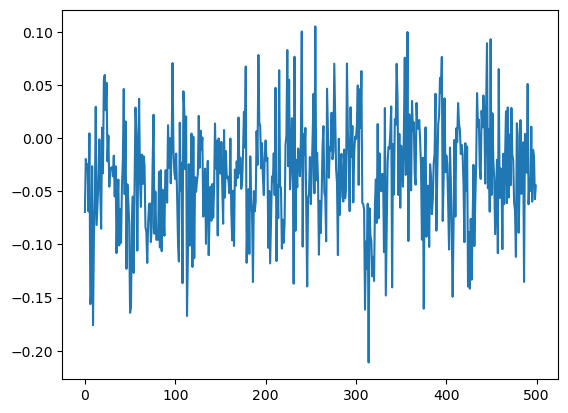

100%|██████████| 500/500 [00:07<00:00, 70.81it/s]


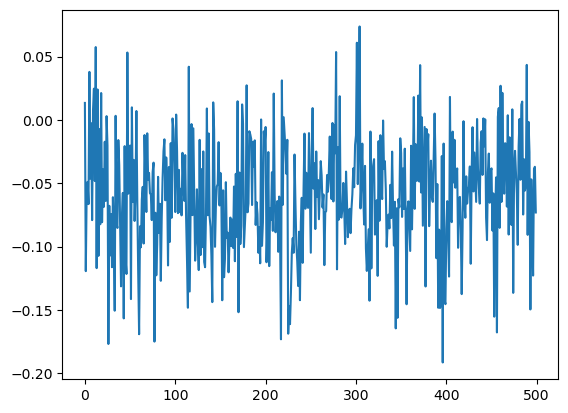

100%|██████████| 500/500 [00:07<00:00, 70.88it/s]


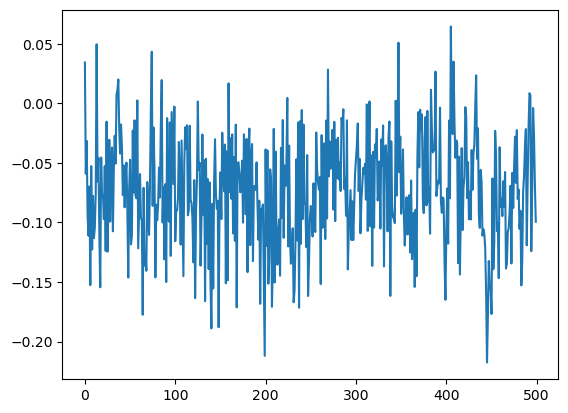

100%|██████████| 500/500 [00:07<00:00, 70.89it/s]


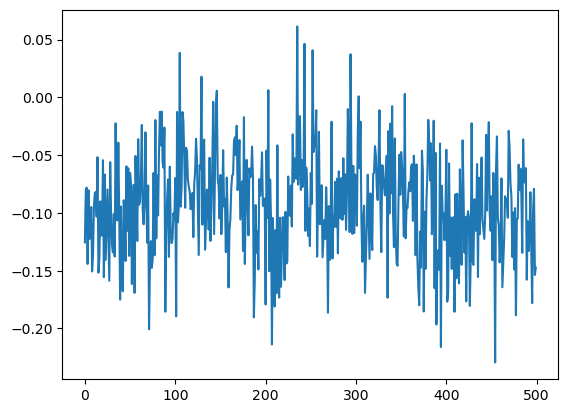

100%|██████████| 500/500 [00:07<00:00, 70.94it/s]


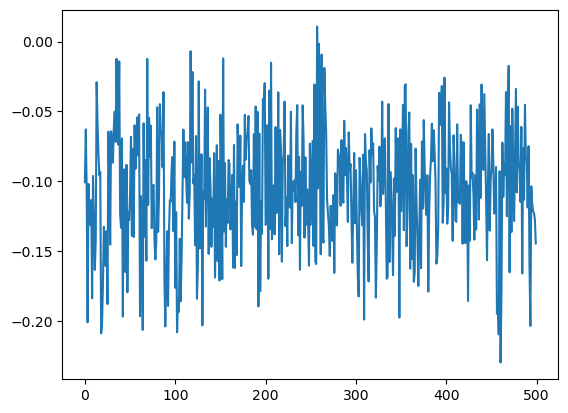

100%|██████████| 500/500 [00:07<00:00, 70.86it/s]


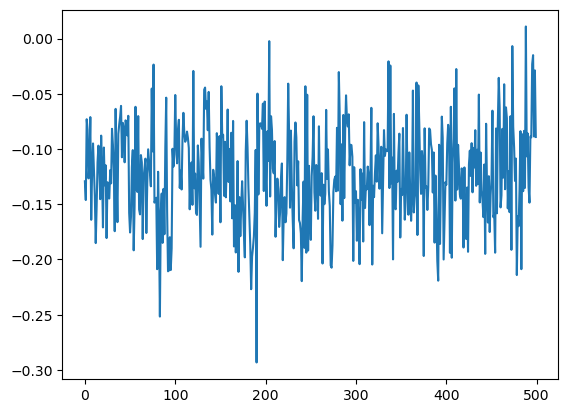

In [8]:
# 1. measure direct friction (fixed w)
%matplotlib inline

AF1.mode='forced'
# relaxation
for i in trange(1000):
    AF1.time_evolve()
# mean_tau = []
# var_tau = []
# omega_list = [0,0.2,0.4,0.6,0.8,1,1.2,1.4]
omega_list = [9,10,11,12,13,14]


len_traj = 500
for omega in omega_list:
    AF1.omega=omega
    tau_traj = np.zeros(len_traj)
    for i in trange(len_traj):
        tau_traj[i]=AF1.time_evolve()
    plt.plot(tau_traj)
    plt.show()
    mean_tau.append(np.mean(tau_traj))
    var_tau.append(np.var(tau_traj))


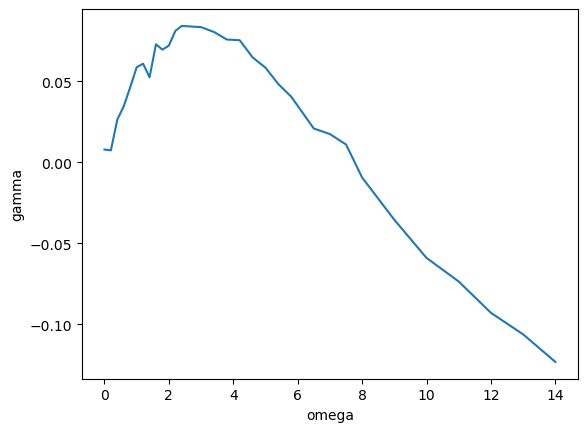

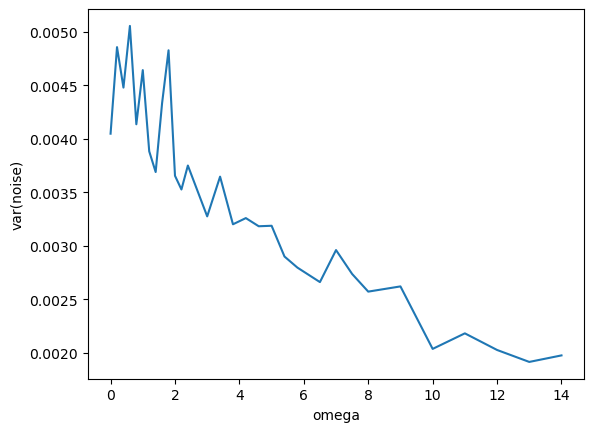

In [23]:
omega_list = [0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2.0,2.2,2.4,3.0,3.4,3.8,4.2,4.6,5.0,5.4,5.8,6.5,7,7.5,8,9,10,11,12,13,14]
plt.plot(omega_list,mean_tau)
plt.ylabel('gamma')
plt.xlabel('omega')
plt.show()
plt.plot(omega_list,var_tau)
plt.ylabel('var(noise)')
plt.xlabel('omega')
plt.show()

$$
D_R= \int _0 ^\infty ds \langle \tau e^{\mathcal{L}_B s } \tau \rangle_B = \int _0 ^\infty ds \langle \tau(s) \tau(0) \rangle_B$$

In [ ]:
# 2. measure correlation function (linear response version, fixed w)
%matplotlib inline

AF1.mode='forced'
AF1.dt = 0.001
# relaxation
for i in trange(1000):
    AF1.time_evolve()
# mean_tau = []
# var_tau = []
omega_list = [0]
# omega_list = [9,10,11,12,13,14]


len_traj = 50000
len_corr = 2000
for omega in omega_list:
    AF1.omega=omega
    tau_traj = np.zeros(len_traj)
    for i in trange(len_traj):
        tau_traj[i]=AF1.time_evolve()
    time = np.arange(len_corr-1)+1
    autocorr= np.zeros(len_corr)
    autocorr[0] = np.average(tau_traj**2)
    for j in time:
        autocorr[j] = np.average(tau_traj[j:]*tau_traj[:-j])
    plt.plot(autocorr)
    plt.grid()
    plt.show()

 45%|████▍     | 22350/50000 [05:20<06:35, 69.86it/s]

$$\gamma_R = \int_0 ^\infty ds\langle \tau e^{\mathcal{L}_B s} \partial_\Theta \ln \pi_B \rangle _B =\int_0 ^\infty ds \langle \tau (s) \partial_\Theta \ln \pi _B (0) \rangle _B$$

$$\langle \tau (s) \partial_\Theta \ln \pi _B (0) \rangle _B = \lim_{\Delta \Theta \rightarrow 0} \frac{1}{\Delta \Theta} [\langle \tau (s)\rangle_{\Theta+\Delta\Theta \rightarrow \Theta} - \langle \tau \rangle_B]
\;,$$

$$\langle \tau(s)\rangle_{\Theta+\Delta\Theta\rightarrow \Theta} \equiv \int d\mathbf{r}_i d\theta_i d\mathbf{r}'_i d\theta_i' \tau(\mathbf{r}_i|\Theta) P[\mathbf{r}_i,\theta_i,s|\mathbf{r}_i',\theta_i',0;\Theta]\pi_B(\mathbf{r}_i,\theta_i|\Theta+\Delta\Theta)
\;.$$

In [ ]:
# 3 perturbation
AF1.mode='forced'
AF1.dt = 0.001
# relaxation
for i in trange(1000):
    AF1.time_evolve()

#perturbation method
AF1.omega=0

dtheta_list = [0.1,0.05,0.03,0.02,0.01,0.005,0.003,0.001]


len_traj = 2000
len_corr = 2000
for dtheta in dtheta_list:
    for i in trange(3000):
        AF1.time_evolve()
    AF1.Theta += dtheta
    tau_traj = np.zeros(len_traj)
    for i in trange(len_traj):
        tau_traj[i]=AF1.time_evolve()
    plt.plot(tau_traj)
    plt.grid()
    plt.show()